 **Multivariable Linear Regression :**

In simple linear regression, we were only able to consider one input feature for predicting the value of the output feature. However, in Multivariable Linear Regression, we can predict the output based on more than one input feature. Here is the formula for multivariable linear regression.
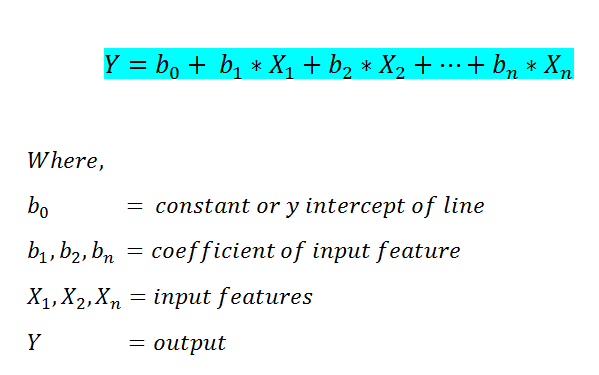

**Step by step implementation in Python :**

***a. Import the required libraries:***


In [1]:
# Import the required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

***b. Read the CSV file :***

In [2]:
# Read the CSV file:
data = pd.read_csv("Fuel.csv")
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


***c. Define X and Y :***

X stores the input features we want to consider, and Y stores the value of output.

In [3]:
# Consider features we want to work on:
X = data[[ "ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY", 
 "FUELCONSUMPTION_COMB","FUELCONSUMPTION_COMB_MPG"]]
Y = data["CO2EMISSIONS"]

***d. Divide data into a testing and training dataset :***

Here we are going to use 80% data in training and 20% data in testing.

In [4]:
# Generating training and testing data from our data:
# We are using 80% data for training.
train = data[:(int((len(data)*0.8)))]
test = data[(int((len(data)*0.8))):]

***e. Train our model :***

Here we are going to train our model with 80% of the data.

In [5]:
#Modeling:
#Using sklearn package to model data :
regr = linear_model.LinearRegression()
train_x = np.array(train[[ "ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY",
 "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB","FUELCONSUMPTION_COMB_MPG"]])
train_y = np.array(train["CO2EMISSIONS"])
regr.fit(train_x,train_y)
test_x = np.array(test[[ "ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY",
 "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB","FUELCONSUMPTION_COMB_MPG"]])
test_y = np.array(test["CO2EMISSIONS"])

***f. Find the coefficients of input features :***

Now we need to know which feature has a more significant effect on the output variable. For that, we are going to print the coefficient values. Note that the negative coefficient means it has an inverse effect on the output. i.e., if the value of that features increases, then the output value decreases.


In [6]:
# print the coefficient values:
coeff_data = pd.DataFrame(regr.coef_ , X.columns , columns=["Coefficients"])
coeff_data

,Coefficients
ENGINESIZE,7.873147
CYLINDERS,8.408908
FUELCONSUMPTION_CITY,-3.368325
FUELCONSUMPTION_HWY,2.742498
FUELCONSUMPTION_COMB,3.851251
FUELCONSUMPTION_COMB_MPG,-4.082913


***g. Predict the values :***

In [7]:
#Now let’s do prediction of data:
Y_pred = regr.predict(test_x)


***h. Accuracy of the model :***

In [8]:
# Check accuracy:
from sklearn.metrics import r2_score
R = r2_score(test_y , Y_pred)
print ("R² :",R)

R² : 0.9362912548588906
